# LSTM TRAINING

In [2]:
import pandas as pd
import numpy as np
import random
from dataset import label_detection_training, label_detection_validation
from models import Lstm, Gru, Transformer

In [3]:
results = pd.DataFrame(columns=['lstm_units', 'dropout_rate', 'epoch', 'batch', 'learning_rate', 'loss', 'loss_max', 'accuracy', 'accuracy_max', 'val_loss', 'val_loss_max', 'val_accuracy', 'val_accuracy_max'])

hyperparameters = {
    'lstm_units': [32, 64, 128],
    'dropout_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
    'epoch': [10, 15, 20, 25],
    'batch_size': [16, 32, 64, 128],
    'learning_rate': [0.0001, 0.001, 0.01]
}


n_iter = 10

for n in range(n_iter):
    
    lstm_params = {param: random.choice(values) for param, values in hyperparameters.items()}
    print(lstm_params)

 
    lstm = Lstm(**lstm_params, num_classes=11)

    lstm.train(label_detection_training, label_detection_validation)
    results = np.concatenate((results, pd.DataFrame([[lstm_params['lstm_units'], lstm_params['dropout_rate'], lstm_params['epoch'], lstm_params['batch_size'], lstm_params['learning_rate'], lstm.history.history['loss'][-1], lstm.history.history['loss'], lstm.history.history['accuracy'][-1], lstm.history.history['accuracy'], lstm.history.history['val_loss'][-1], lstm.history.history['val_loss'], lstm.history.history['val_accuracy'][-1], lstm.history.history['val_accuracy']]], 
                                                                        columns=['gru_units', 'dropout_rate', 'epoch', 'batch', 'learning_rate', 'loss', 'loss_max', 'accuracy', 'accuracy_max', 'val_loss', 'val_loss_max', 'val_accuracy', 'val_accuracy_max'])), axis=0)

    



{'lstm_units': 32, 'dropout_rate': 0.1, 'epoch': 20, 'batch_size': 64, 'learning_rate': 0.001}
Epoch 1/20
906/906 [==============================] - ETA: 0s - loss: 1.4601 - accuracy: 0.5841
Epoch 1: val_accuracy improved from -inf to 0.68741, saving model to models\lstm.h5
906/906 [==============================] - 334s 245ms/step - loss: 1.4601 - accuracy: 0.5841 - val_loss: 1.0370 - val_accuracy: 0.6874
Epoch 2/20
906/906 [==============================] - ETA: 0s - loss: 0.9223 - accuracy: 0.7276
Epoch 2: val_accuracy improved from 0.68741 to 0.74478, saving model to models\lstm.h5
906/906 [==============================] - 182s 199ms/step - loss: 0.9223 - accuracy: 0.7276 - val_loss: 0.8562 - val_accuracy: 0.7448
Epoch 3/20
906/906 [==============================] - ETA: 0s - loss: 0.7481 - accuracy: 0.7761
Epoch 3: val_accuracy improved from 0.74478 to 0.78553, saving model to models\lstm.h5
906/906 [==============================] - 179s 196ms/step - loss: 0.7481 - accuracy: 0.7

KeyboardInterrupt: 

In [4]:
lstm_params = {'lstm_units': 32, 'dropout_rate': 0.1, 'epoch': 20, 'batch_size': 64, 'learning_rate': 0.001}
lstm = Lstm(**lstm_params, num_classes=11, model_path='models\\best_lstm.h5')
lstm.train(label_detection_training, label_detection_validation)

Epoch 1/20
906/906 [==============================] - ETA: 0s - loss: 1.4522 - accuracy: 0.6015
Epoch 1: val_accuracy improved from -inf to 0.70094, saving model to models\best_lstm.h5
906/906 [==============================] - 133s 134ms/step - loss: 1.4522 - accuracy: 0.6015 - val_loss: 1.0330 - val_accuracy: 0.7009
Epoch 2/20
906/906 [==============================] - ETA: 0s - loss: 0.9238 - accuracy: 0.7254
Epoch 2: val_accuracy improved from 0.70094 to 0.75331, saving model to models\best_lstm.h5
906/906 [==============================] - 119s 131ms/step - loss: 0.9238 - accuracy: 0.7254 - val_loss: 0.8364 - val_accuracy: 0.7533
Epoch 3/20
906/906 [==============================] - ETA: 0s - loss: 0.7461 - accuracy: 0.7745
Epoch 3: val_accuracy improved from 0.75331 to 0.77523, saving model to models\best_lstm.h5
906/906 [==============================] - 110s 121ms/step - loss: 0.7461 - accuracy: 0.7745 - val_loss: 0.7356 - val_accuracy: 0.7752
Epoch 4/20
906/906 [==============

# Best LSTM result

In [5]:
import matplotlib.pyplot as plt

In [8]:
print(lstm.history.history['loss'])
print(lstm.history.history['val_loss'])
print(lstm.history.history['accuracy'])
print(lstm.history.history['val_accuracy'])

[1.4521511793136597, 0.9237975478172302, 0.7460747361183167, 0.6497703194618225, 0.5786059498786926, 0.5252687931060791, 0.49317628145217896, 0.4564570188522339, 0.4342915713787079, 0.4124603569507599, 0.3918772041797638, 0.3763596713542938, 0.3627377152442932, 0.3522157669067383, 0.34371811151504517, 0.3313392698764801, 0.3180958330631256, 0.31484490633010864, 0.29900747537612915]
[1.0330215692520142, 0.8364176154136658, 0.735633909702301, 0.6561920642852783, 0.6156397461891174, 0.5828851461410522, 0.5663608312606812, 0.5632092356681824, 0.5480222702026367, 0.551646888256073, 0.5243154168128967, 0.5644021034240723, 0.5587053298950195, 0.5180103778839111, 0.5443403124809265, 0.562040388584137, 0.5410253405570984, 0.5319318771362305, 0.5339295268058777]
[0.60150545835495, 0.7254458665847778, 0.7745282649993896, 0.8042401075363159, 0.8259240984916687, 0.8410303592681885, 0.8508191704750061, 0.8615748286247253, 0.8674274682998657, 0.8748683333396912, 0.8801167011260986, 0.8846054077148438

## Loss

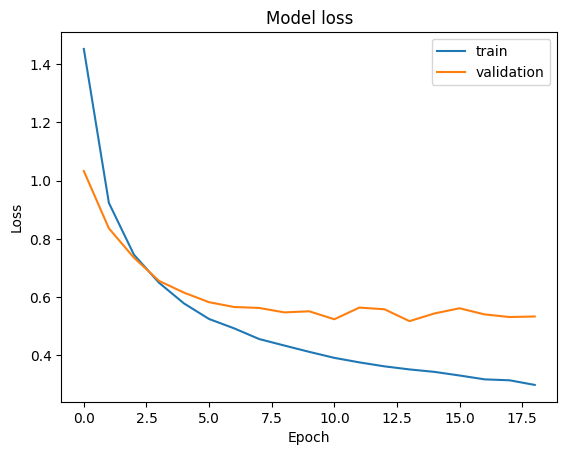

In [6]:
plt.plot(lstm.history.history['loss'], label='train')
plt.plot(lstm.history.history['val_loss'], label='validation')
plt.legend()
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

## Accuracy

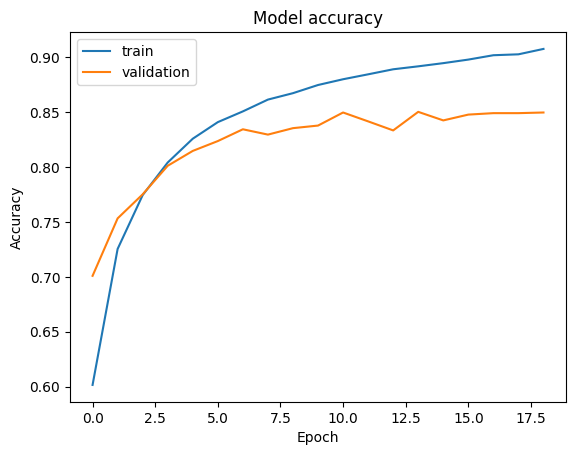

In [7]:
plt.plot(lstm.history.history['accuracy'], label='train')
plt.plot(lstm.history.history['val_accuracy'], label='validation')
plt.legend()
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [ ]:
results = pd.DataFrame(results)
results